In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')
data = data[['cp', 'slp', 'output']]

In [4]:
#correlation matrix of data
corr_matrix = data.corr()
print(corr_matrix)

              cp       slp    output
cp      1.000000  0.119717  0.433798
slp     0.119717  1.000000  0.345877
output  0.433798  0.345877  1.000000


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Forward propagation
def linear_calc(X, w, b):
    z = np.dot(X, w) + b
    a = sigmoid(z)
    return a

# Compute cost
def compute_cost(a, y):
    m = y.shape[0]
    cost = (-1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost

# Backward propagation
def grad_calc(X, a, y):
    m = y.shape[0]
    dw = (1/m) * np.dot(X.T, (a - y))
    db = (1/m) * np.sum(a - y)
    return dw, db

# Gradient descent
def gradient_descent(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Logistic regression model
def logistic_regression(X, y, num_iterations, learning_rate):
    w, b = initialize_parameters(X.shape[1])
    
    for i in range(num_iterations):
        a = linear_calc(X, w, b)
        cost = compute_cost(a, y)
        dw, db = grad_calc(X, a, y)
        w, b = gradient_descent(w, b, dw, db, learning_rate)
        
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return w, b

X = data.drop('output', axis=1)
y = data['output']

# Assuming you already have X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (you can also implement this)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


# Train the logistic regression model
num_iterations = 1000
learning_rate = 0.01
w, b = logistic_regression(X_train, y_train.reshape(-1, 1), num_iterations, learning_rate)

# Make predictions
z_test = np.dot(X_test, w) + b
y_pred = (sigmoid(z_test) >= 0.5).astype(int)

# Calculate and print accuracy, precision, recall, and F1-score (you can implement these)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.637331161954802
Cost after iteration 200: 0.6046789374537939
Cost after iteration 300: 0.5849312916880666
Cost after iteration 400: 0.5725584190621695
Cost after iteration 500: 0.564558982903447
Cost after iteration 600: 0.559249371600825
Cost after iteration 700: 0.555648181240245
Cost after iteration 800: 0.5531621135506104
Cost after iteration 900: 0.5514207389038813
Accuracy: 0.7869
Precision: 0.7879
Recall: 0.8125
F1 Score: 0.8000


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (Your existing code for logistic regression and making predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[22  7]
 [ 6 26]]


In [25]:
np.sum((y_test == 1) & (y_pred == 1))

1056

Accuracy: 0.7869
True Positives: 26
True Negatives: 22
False Positives: 7
False Negatives: 6
Precision: 0.7879
Recall: 0.8125
F1-Score: 0.8000


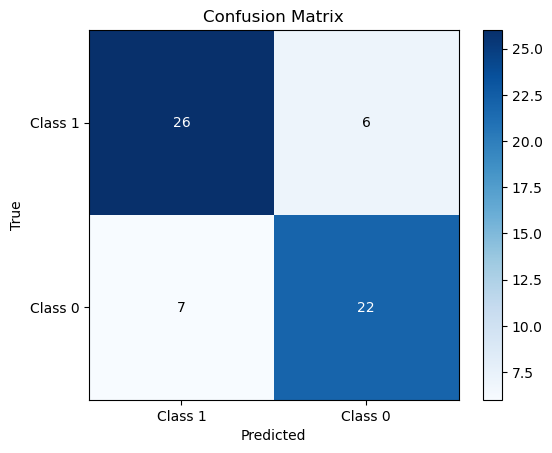

In [28]:
y_pred = y_pred.ravel()  # or y_pred = np.squeeze(y_pred)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

#TP = np.sum(y_pred[y_test == 1])
#FP = np.sum(y_pred[y_test == 0])
#FN = np.sum(~y_pred[y_test == 1])

# Calculate TP, TN, FP, FN
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

# Print TP, TN, FP, FN
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

confusion_matrix = np.array([[TP, FP], [FN, TN]])
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)

plt.text(0, 0, str(confusion_matrix[0, 0]), ha='center', va='center', color='white')
plt.text(1, 1, str(confusion_matrix[1, 1]), ha='center', va='center', color='white')
plt.text(0, 1, str(confusion_matrix[0, 1]), ha='center', va='center', color='black')
plt.text(1, 0, str(confusion_matrix[1, 0]), ha='center', va='center', color='black')

plt.xticks(tick_marks, ['Class 1', 'Class 0'])
plt.yticks(tick_marks, ['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

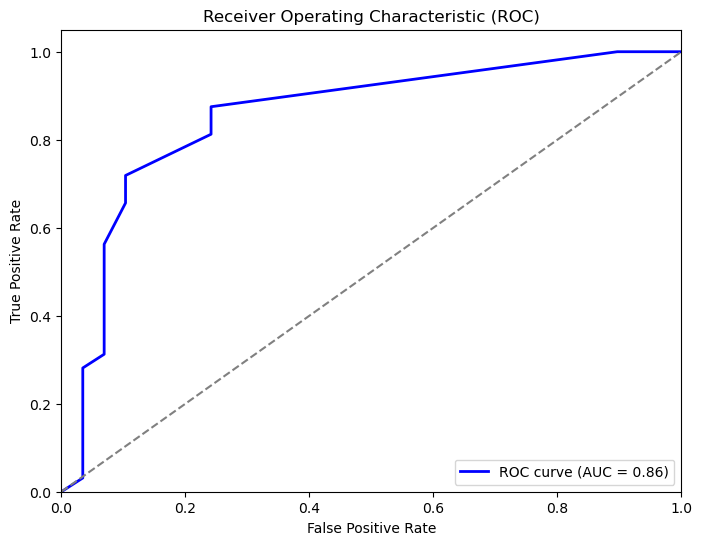

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the positive class
z_test = np.dot(X_test, w) + b
y_pred_prob = sigmoid(z_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()